In [56]:
import pandas as pd
import numpy as np

In [57]:
raw_data = pd.read_csv("kc_house_data.csv")
raw_data.head()

,sqft,floors,bedrooms,bathrooms,price
0,5650,1.0,3,1.00,221900.0
1,7242,2.0,3,2.25,538000.0
2,10000,1.0,2,1.00,180000.0
3,5000,1.0,4,3.00,604000.0
4,8080,1.0,3,2.00,510000.0


In [58]:
data = np.array(raw_data)

In [59]:
no_of_examples = data.shape[0]
no_of_features = data.shape[1]-1

In [60]:
#no_train = 100
no_train = int(0.8*no_of_examples)
no_train

17290

In [61]:
X_train = data[:no_train,:-1]
y_train = data[:no_train,-1]
X_test = data[no_train:,:-1]
y_test = data[no_train:,-1].reshape(-1,1)

In [62]:
X_mean = np.mean(X_train,axis=0)
X_std = np.std(X_train,axis=0)
X_train = (X_train - X_mean)/X_std
X_test = (X_test-X_mean)/X_std

In [63]:
y_mean = np.mean(y_train,axis=0)
y_std = np.std(y_train,axis=0)
y_train = (y_train - y_mean)/y_std
print(y_std,y_mean)

366164.044034 533343.832331


In [64]:
class Linear_model:
    def __init__(self,m,X,y):
        #self.W = np.zeros((m,1))
        np.random.seed(4)
        self.W = np.random.randn(m,1)
        self.b = 0
        self.X = X
        self.N = X.shape[0]
        self.y = y.reshape((self.N,1))
        
    
    def train_abs_err(self,lr=0.1):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        abs_err = np.absolute(err)
        loss = np.sum(abs_err)/self.N
        
        grad = np.where(err>=0,self.X,-self.X)
        grad = np.mean(grad,axis=0)
        grad = grad.reshape((grad.shape[0],1))
        gradb = np.where(err>=0,1,-1)
        gradb = np.mean(gradb)

        self.W -= lr*grad
        self.b -= lr*gradb
        
        return loss
    
    def train_squared_err(self, lr, reg = 0):
        pred = (self.X).dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        loss = np.sum(err2)/self.N
        loss += reg*np.sum(self.W**2)
        
        grad = (self.X).T.dot(err)
        grad *= 2/self.N
        
        grad += 2*reg*self.W
        
        self.W -= lr*grad
        self.b -= lr*np.sum(err)*2/self.N
        
        return loss
    
    def train_cub_err(self,lr=0.1):
        pred = self.X.dot(self.W) + self.b
        err = pred - self.y
        err2 = err**2
        err3 = err**3

        loss = np.mean(err3,axis=0)
        
        grad = self.X.T.dot(err2)
        grad *= 2/self.N
        gradb = np.sum(err2)*3/self.N
        
        self.W -= lr*grad
        self.b -= lr*gradb
        
        return loss
    
    def evaluate(self,testX):
        return (testX).dot(self.W) + self.b      
        
        
        

In [65]:
'''
no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
RMSE_plot = []
for i in range(no_of_epochs):
    loss = model.train_cub_err(lr=0.005)
    print(loss)
    RMSE_plot.append(loss)
'''

'\nno_of_epochs = 500\nmodel = Linear_model(no_of_features, X_train,y_train)\nRMSE_plot = []\nfor i in range(no_of_epochs):\n    loss = model.train_cub_err(lr=0.005)\n    print(loss)\n    RMSE_plot.append(loss)\n'

In [66]:

no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
abs_itr = []
for i in range(no_of_epochs):
    model.train_abs_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print("Iteration "+str(i+1)+": ",test_loss)
    abs_itr.append(test_loss)


Iteration 1:  534844.833113
Iteration 2:  526993.442876
Iteration 3:  519262.086478
Iteration 4:  511643.440319
Iteration 5:  504137.08561
Iteration 6:  496744.306901
Iteration 7:  489495.772187
Iteration 8:  482366.823022
Iteration 9:  475379.00834
Iteration 10:  468521.024187
Iteration 11:  461798.496049
Iteration 12:  455214.48491
Iteration 13:  448791.926205
Iteration 14:  442536.698413
Iteration 15:  436447.781865
Iteration 16:  430516.994514
Iteration 17:  424755.347962
Iteration 18:  419164.497953
Iteration 19:  413748.312993
Iteration 20:  408510.313543
Iteration 21:  403439.796767
Iteration 22:  398530.914176
Iteration 23:  393810.32876
Iteration 24:  389256.748097
Iteration 25:  384872.013302
Iteration 26:  380669.507694
Iteration 27:  376654.75626
Iteration 28:  372829.283221
Iteration 29:  369174.89568
Iteration 30:  365687.133016
Iteration 31:  362380.178501
Iteration 32:  359245.038836
Iteration 33:  356285.950393
Iteration 34:  353504.06733
Iteration 35:  350878.927094
I

Iteration 409:  323214.481453
Iteration 410:  323214.410918
Iteration 411:  323213.95215
Iteration 412:  323215.043219
Iteration 413:  323214.925082
Iteration 414:  323215.023172
Iteration 415:  323215.168831
Iteration 416:  323215.236211
Iteration 417:  323215.584933
Iteration 418:  323215.263768
Iteration 419:  323215.361829
Iteration 420:  323216.202245
Iteration 421:  323216.347901
Iteration 422:  323216.026613
Iteration 423:  323216.124726
Iteration 424:  323216.019753
Iteration 425:  323215.698503
Iteration 426:  323216.742085
Iteration 427:  323216.637119
Iteration 428:  323216.315869
Iteration 429:  323216.414049
Iteration 430:  323216.55963
Iteration 431:  323216.238388
Iteration 432:  323217.281992
Iteration 433:  323217.177041
Iteration 434:  323216.8558
Iteration 435:  323216.954015
Iteration 436:  323217.099574
Iteration 437:  323217.723765
Iteration 438:  323217.821968
Iteration 439:  323217.717032
Iteration 440:  323217.3958
Iteration 441:  323217.494048
Iteration 442:  

In [67]:

no_of_epochs = 500
model = Linear_model(no_of_features, X_train,y_train)
sqr_itr = []
for i in range(no_of_epochs):
    model.train_squared_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = pred_test*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print("Iteration "+str(i+1)+": ",test_loss)
    sqr_itr.append(test_loss)


Iteration 1:  517171.820172
Iteration 2:  494293.210174
Iteration 3:  473871.199919
Iteration 4:  455650.108188
Iteration 5:  439408.238209
Iteration 6:  424949.426935
Iteration 7:  412097.383446
Iteration 8:  400691.96362
Iteration 9:  390586.755832
Iteration 10:  381647.524438
Iteration 11:  373751.187708
Iteration 12:  366785.105229
Iteration 13:  360646.523951
Iteration 14:  355242.087215
Iteration 15:  350487.35136
Iteration 16:  346306.28264
Iteration 17:  342630.726003
Iteration 18:  339399.848764
Iteration 19:  336559.568429
Iteration 20:  334061.976369
Iteration 21:  331864.769116
Iteration 22:  329930.697654
Iteration 23:  328227.043013
Iteration 24:  326725.124205
Iteration 25:  325399.842363
Iteration 26:  324229.263059
Iteration 27:  323194.237222
Iteration 28:  322278.059889
Iteration 29:  321466.165154
Iteration 30:  320745.855117
Iteration 31:  320106.060266
Iteration 32:  319537.12856
Iteration 33:  319030.64049
Iteration 34:  318579.247383
Iteration 35:  318176.530435

Iteration 350:  314935.632706
Iteration 351:  314935.633075
Iteration 352:  314935.633431
Iteration 353:  314935.633774
Iteration 354:  314935.634105
Iteration 355:  314935.634423
Iteration 356:  314935.634729
Iteration 357:  314935.635024
Iteration 358:  314935.635308
Iteration 359:  314935.635581
Iteration 360:  314935.635845
Iteration 361:  314935.636098
Iteration 362:  314935.636343
Iteration 363:  314935.636578
Iteration 364:  314935.636805
Iteration 365:  314935.637023
Iteration 366:  314935.637233
Iteration 367:  314935.637435
Iteration 368:  314935.63763
Iteration 369:  314935.637818
Iteration 370:  314935.637999
Iteration 371:  314935.638173
Iteration 372:  314935.63834
Iteration 373:  314935.638502
Iteration 374:  314935.638657
Iteration 375:  314935.638807
Iteration 376:  314935.638951
Iteration 377:  314935.63909
Iteration 378:  314935.639224
Iteration 379:  314935.639352
Iteration 380:  314935.639476
Iteration 381:  314935.639596
Iteration 382:  314935.639711
Iteration 383

In [68]:
lrs = [0.001,0.002,0.005,0.01,0.02,0.05,0.08,0.1]

In [69]:
no_of_epochs = 500
abs_plot = []
abs_params = {}
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train_abs_err(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    abs_plot.append(test_loss)
    abs_params[l] = (model.W,model.b)
print("Mean Absolute Error Cost Function")
for i in range(len(lrs)):
    print("Learning Rate: "+str(lrs[i])+", Test Loss: \t",abs_plot[i])

Mean Absolute Error Cost Function
Learning Rate: 0.001, Test Loss: 	 468762.395375
Learning Rate: 0.002, Test Loss: 	 409021.450232
Learning Rate: 0.005, Test Loss: 	 327429.474666
Learning Rate: 0.01, Test Loss: 	 320416.470618
Learning Rate: 0.02, Test Loss: 	 322761.273625
Learning Rate: 0.05, Test Loss: 	 323221.873338
Learning Rate: 0.08, Test Loss: 	 323229.048815
Learning Rate: 0.1, Test Loss: 	 323228.524087


In [70]:
no_of_epochs = 500
sqr_plot = []
sqr_params = {}
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train_squared_err(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    sqr_plot.append(test_loss)
    sqr_params[l] = (model.W,model.b)
print("Mean Squared Error Cost Function")
for i in range(len(lrs)):
    print("Learning Rate: "+str(lrs[i])+", Test Loss: \t",sqr_plot[i])

Mean Squared Error Cost Function
Learning Rate: 0.001, Test Loss: 	 384822.032767
Learning Rate: 0.002, Test Loss: 	 335879.809142
Learning Rate: 0.005, Test Loss: 	 315536.259317
Learning Rate: 0.01, Test Loss: 	 314833.272292
Learning Rate: 0.02, Test Loss: 	 314932.557978
Learning Rate: 0.05, Test Loss: 	 314935.642672
Learning Rate: 0.08, Test Loss: 	 314935.642707
Learning Rate: 0.1, Test Loss: 	 314935.642707


In [71]:
'''
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
sqr_plot = []
for i in range(no_of_epochs):
    loss = model.train_squared_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    sqr_plot.append(test_loss)
'''

'\nno_of_epochs = 300\nmodel = Linear_model(no_of_features, X_train,y_train)\nsqr_plot = []\nfor i in range(no_of_epochs):\n    loss = model.train_squared_err(lr=0.05)\n    pred_test = model.evaluate(X_test)\n    pred_test = (pred_test)*y_std + y_mean\n    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])\n    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))\n    print(test_loss)\n    sqr_plot.append(test_loss)\n'

In [72]:
no_of_epochs = 500
cub_plot = []
cub_params = {}
for l in lrs:
    model = Linear_model(no_of_features, X_train,y_train)
    for i in range(no_of_epochs):
        loss = model.train_cub_err(lr=l)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    cub_plot.append(test_loss)
    cub_params[l] = (model.W,model.b)
print("Mean cubed Error Cost Function")
for i in range(len(lrs)):
    print("Learning Rate: "+str(lrs[i])+", Test Loss: \t",cub_plot[i])

/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in square
/home/ayush/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:50: RuntimeWarning: overflow encountered in power


Mean cubed Error Cost Function
Learning Rate: 0.001, Test Loss: 	 nan
Learning Rate: 0.002, Test Loss: 	 nan
Learning Rate: 0.005, Test Loss: 	 nan
Learning Rate: 0.01, Test Loss: 	 nan
Learning Rate: 0.02, Test Loss: 	 nan
Learning Rate: 0.05, Test Loss: 	 nan
Learning Rate: 0.08, Test Loss: 	 nan
Learning Rate: 0.1, Test Loss: 	 nan


In [73]:
'''
no_of_epochs = 300
model = Linear_model(no_of_features, X_train,y_train)
cub_plot = []
for i in range(no_of_epochs):
    loss = model.train_cub_err(lr=0.05)
    pred_test = model.evaluate(X_test)
    pred_test = (pred_test)*y_std + y_mean
    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])
    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))
    print(test_loss)
    cub_plot.append(test_loss)
'''

'\nno_of_epochs = 300\nmodel = Linear_model(no_of_features, X_train,y_train)\ncub_plot = []\nfor i in range(no_of_epochs):\n    loss = model.train_cub_err(lr=0.05)\n    pred_test = model.evaluate(X_test)\n    pred_test = (pred_test)*y_std + y_mean\n    #test_loss = np.sqrt(np.sum(((pred_test - y_test)**2))/X_test.shape[0])\n    test_loss = np.sqrt(np.mean(np.square(pred_test - y_test)))\n    print(test_loss)\n    cub_plot.append(test_loss)\n'

In [74]:
import matplotlib.pyplot as plt

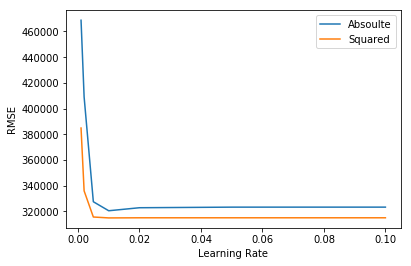

In [75]:
%matplotlib inline
abs_, = plt.plot(lrs,abs_plot)
sqr_, = plt.plot(lrs,sqr_plot)
plt.xlabel("Learning Rate")
plt.ylabel("RMSE")
plt.legend([abs_, sqr_],["Absoulte","Squared"])
plt.savefig("1d_TestRMSEvsLearningRate.png")

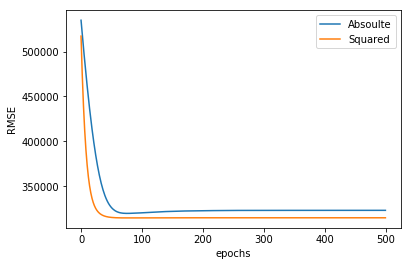

In [76]:
abss_, = plt.plot(range(500),abs_itr[:500])
sqrs_, = plt.plot(range(500),sqr_itr)
plt.xlabel("epochs")
plt.ylabel("RMSE")
plt.legend([abss_, sqrs_],["Absoulte","Squared"])

**Preferred Cost Function :** First we see that it is not necessary for the Cubic Cost Function to converge. As, the Cubic Cost can also give Negative values, we find that the gradient values explode and thus we have not been able to plot the graphs for cubic cost function. Among Abosulte and Squared Cost Function, we prefer Squared cost function as it gives lower test RMSE value as evident from both the graphs (test RMSE vs Learnign rate) and (test RMSE vs no_of_iterations for lr = 0.05)

In [77]:
print("Mean Absolute Error Cost Function\n")
for (key,val) in abs_params.items():
    print("Learning Rate: ",key)
    print("W: ",val[0].T)
    print("B: ",val[1])
    print()

Mean Absolute Error Cost Function

Learning Rate:  0.001
W:  [[ 0.04024118  0.38510575 -0.77155589  0.67098721]]
B:  -0.0230899942163

Learning Rate:  0.002
W:  [[ 0.03148942  0.27723138 -0.57435887  0.6333028 ]]
B:  -0.0439315211105

Learning Rate:  0.005
W:  [[ 0.02717743  0.07287505 -0.17757212  0.49783425]]
B:  -0.10313880856

Learning Rate:  0.01
W:  [[ 0.03730489  0.02757124  0.00849493  0.36672553]]
B:  -0.147496818971

Learning Rate:  0.02
W:  [[ 0.0466238   0.04832415  0.04713456  0.31322957]]
B:  -0.155141700405

Learning Rate:  0.05
W:  [[ 0.04796402  0.05251947  0.04997769  0.30625324]]
B:  -0.156379410064

Learning Rate:  0.08
W:  [[ 0.04794735  0.05258579  0.04998816  0.30617719]]
B:  -0.156418739156

Learning Rate:  0.1
W:  [[ 0.04798617  0.05257884  0.04999912  0.30616746]]
B:  -0.156402544824



In [78]:
print("Mean Squared Error Cost Function\n")
for (key,val) in sqr_params.items():
    print("Learning Rate: ",key)
    print("W: ",val[0].T)
    print("B: ",val[1])
    print()

Mean Squared Error Cost Function

Learning Rate:  0.001
W:  [[ 0.04206521  0.22102294 -0.44839919  0.68898716]]
B:  1.80049433367e-16

Learning Rate:  0.002
W:  [[ 0.0371807   0.08706615 -0.20777818  0.63509884]]
B:  1.9376241502e-16

Learning Rate:  0.005
W:  [[ 0.03851143  0.01145159 -0.00151656  0.53344649]]
B:  1.56500222459e-16

Learning Rate:  0.01
W:  [[ 0.04209164  0.0235177   0.03939552  0.48975644]]
B:  1.38646243769e-16

Learning Rate:  0.02
W:  [[ 0.04287045  0.0279435   0.04455977  0.48185237]]
B:  1.38278438247e-16

Learning Rate:  0.05
W:  [[ 0.04288975  0.02805758  0.04467961  0.48165961]]
B:  1.39190760325e-16

Learning Rate:  0.08
W:  [[ 0.04288975  0.02805758  0.04467961  0.48165961]]
B:  1.39692126512e-16

Learning Rate:  0.1
W:  [[ 0.04288975  0.02805758  0.04467961  0.48165961]]
B:  1.37423649993e-16



In [80]:
print("Mean cubed Error Cost Function\n")
for (key,val) in cub_params.items():
    print("Learning Rate: ",key)
    print("W: ",val[0].T)
    print("B: ",val[1])
    print()

Mean cubed Error Cost Function

Learning Rate:  0.001
W:  [[ nan  nan  nan  nan]]
B:  nan

Learning Rate:  0.002
W:  [[ nan  nan  nan  nan]]
B:  nan

Learning Rate:  0.005
W:  [[ nan  nan  nan  nan]]
B:  nan

Learning Rate:  0.01
W:  [[ nan  nan  nan  nan]]
B:  nan

Learning Rate:  0.02
W:  [[ nan  nan  nan  nan]]
B:  nan

Learning Rate:  0.05
W:  [[ nan  nan  nan  nan]]
B:  nan

Learning Rate:  0.08
W:  [[ nan  nan  nan  nan]]
B:  nan

Learning Rate:  0.1
W:  [[ nan  nan  nan  nan]]
B:  nan

